In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [290]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, dimension_reduction

In [193]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
df = df[:24]
tdKMeans = TimeDivisionKMeans(df)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [195]:
tdKMeans.init_setting()

init_setting func start
init_setting func end


In [251]:
size = 3
division_round = 0
households_size = len(df.columns)
total_size = len(df)
division_size = round(total_size / size)

division_df = [df[_:_ + size] for _ in range(0,total_size, size)]

In [385]:
init_K = np.array([])
K_pattern = np.array([])

while len(init_K) < 7:
    _K = ran.randint(0, households_size)
    
    if _K not in init_K:
        init_K = np.append(init_K, _K)
        
now_df = division_df[division_round].copy().T
idxes = now_df.index

for _K in init_K:
    idx = idxes[int(_K)]
    pattern = now_df.loc[idx].values
    K_pattern = np.append(
        K_pattern,
        pattern
    )
    
K_pattern = K_pattern.reshape(-1,size)

K_pattern

array([[0.161, 0.179, 0.182],
       [0.337, 0.374, 0.282],
       [0.335, 0.19 , 0.143],
       [0.539, 0.242, 0.24 ],
       [0.571, 0.327, 0.359],
       [0.364, 0.252, 0.268],
       [0.245, 0.257, 0.231]])

In [ ]:
prev_clusters = None

In [402]:
clusters = np.array([])

for idx in now_df.index:
    test = now_df.loc[idx].values
    test = np.expand_dims(test, axis=0)

    cluster = euc(test, K_pattern).argmin()
    clusters = np.append(clusters, cluster)


print((clusters == prev_clusters).all())
prev_clusters = clusters
clusters

True


array([1., 0., 1., 0., 0., 0., 0., 2., 2., 0., 1., 0., 1., 5., 1., 4., 0.,
       3., 6., 6., 6., 0., 0., 2., 5., 5., 6., 1., 3., 0., 4., 5., 0., 3.,
       6., 0., 4., 4., 1., 3., 0., 6., 0., 4., 3., 4., 4., 0., 2., 0., 4.,
       0., 5., 6., 3., 5., 6., 6., 4., 6., 5., 2., 4., 1., 6., 4., 6., 0.,
       0., 0., 5., 0., 0., 0., 6., 0., 6., 6., 2., 0., 4., 6., 6., 0., 1.,
       6., 4., 1., 5., 4., 0., 0., 5., 6., 1., 6., 6., 1., 5., 6., 5., 1.,
       3., 1., 6., 0., 6., 1.])

In [403]:
next_round_K_pattern = np.array([])

for idx in range(0, 7):
    next_round_K_pattern = np.append(
        next_round_K_pattern,
        (np.round(now_df[clusters == idx].mean() * 1000) / 1000)
    )
next_round_K_pattern = next_round_K_pattern.reshape(-1, size)    
K_pattern = next_round_K_pattern

In [406]:
K_pattern

array([[0.136, 0.127, 0.13 ],
       [0.36 , 0.354, 0.377],
       [0.338, 0.208, 0.176],
       [0.559, 0.292, 0.255],
       [0.675, 0.571, 0.476],
       [0.367, 0.295, 0.273],
       [0.228, 0.238, 0.23 ]])

In [436]:
K_pattern.sum(axis=1).argsort()[::-1]

array([4, 3, 1, 5, 2, 6, 0])

In [437]:
K_pattern.sum(axis=1).argsort()[::-1]

array([4, 3, 1, 5, 2, 6, 0])

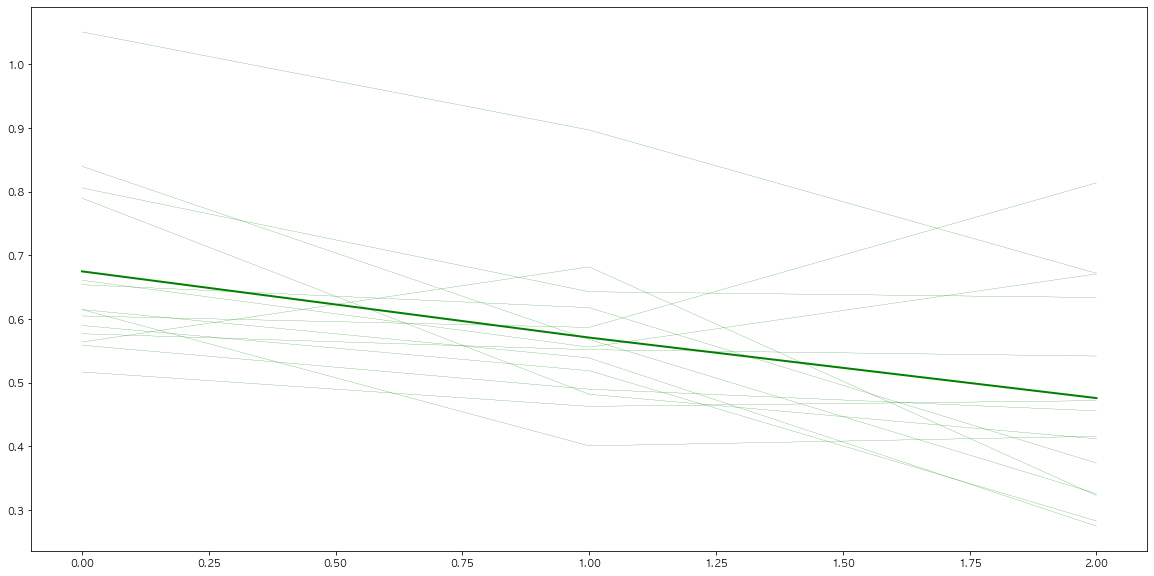

In [430]:
plt.figure(figsize=(20,10))

plt.plot(now_df[clusters == 4].T.values, color='g', linewidth=0.2)
plt.plot(K_pattern[4], color='g', linewidth=2)

plt.show()